In this notebook:

1. [Simple: **Counting Tokens**](#1)
2. [Visualising **Frequency Distributions** (but first, **cleaning up the data**)](#2)
3. [Advanced Visualisation: **Word Clouds**](#3)

<a id="1"></a>
# 1. Simple: Counting Tokens

#### Questions & Objectives

- How can I count tokens in text?

#### Key Points

- To count tokens, one can make use of NLTK’s `FreqDist` class from the `probability` package. The `N()` method can then be used to count how many tokens a text or corpus contains.
- Counts for a specific token can be obtained using `fdist["token"]`.

In [1]:
# Run this cell now. It's the usual imports of text mining libraries.

import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Let's load the India corpus and lowercase it. This will take a minute to run.

from nltk.corpus import PlaintextCorpusReader
corpus_root = "./data/Medical_History_of_British_India"
corpus_reader = PlaintextCorpusReader(corpus_root, '.*', encoding='latin1') 
corpus_tokens = corpus_reader.words() 
print("loaded tokens:", len(corpus_tokens) )

corpus_tokens = [word.lower() for word in corpus_tokens] 
print("finished lowercasing")

loaded tokens: 28345943
finished lowercasing


## Counting tokens in text

You can also do other useful things like count the number of tokens in a text, determine the count and percentage of particular tokens in a corpus, and plot the count distributions as a graph. To do this we have to import the `FreqDist` class from the NLTK `probability` package. When calling this class, a list of tokens from a text or corpus needs to be specified as a parameter in brackets.

In [3]:
# This will take a minute, too.

from nltk.probability import FreqDist
fdist = FreqDist(corpus_tokens)
print(fdist)

<FreqDist with 180893 samples and 28345943 outcomes>


You can print the counts of most common tokens with `freq_dist_object.most_common( how_many )`,

e.g., `fdist.most_common(100)` for the most common 100 words.

The results will be arranged starting from the top most frequent tokens with the frequency counts.

In [4]:
print(fdist.most_common(100))

# Fun fact: notice that this is a list of tuples [('word1', 233), ('word2', 2324), ...]

[('.', 2472231), ('...', 1634912), (',', 1340864), ('the', 1193271), ('of', 784526), ('..', 549026), ('1', 536219), ('and', 442524), ('in', 417258), ('-', 369299), ('to', 340151), ('2', 294745), ('a', 245100), ('0', 228130), ('3', 220906), ('4', 179501), ('is', 157739), ('5', 153171), ('6', 142202), ('for', 141043), ('8', 115088), ('on', 115080), ('7', 113699), ('(', 112305), ('by', 111002), ('that', 109368), ('be', 108858), ('was', 107039), ('as', 105445), ('from', 103147), ('9', 99468), ('it', 94182), ('total', 94009), ('10', 91857), ('with', 89422), ('year', 82829), ('at', 82410), (')', 81355), ('were', 80461), ('i', 78835), ('no', 76388), ('11', 74753), ('this', 73792), ('are', 71826), ('or', 69733), ('which', 66949), ('12', 66645), (';', 66028), ('not', 65382), ('number', 63358), ('13', 57350), ('15', 55528), ('14', 55430), ('have', 53978), ('been', 53866), ('during', 51209), ('rs', 49600), ('.,', 46864), ('c', 44069), ('has', 43862), ('"', 43796), ('20', 43549), ('16', 42999), ('

In [5]:
# Instead of printing, you can just return the value from the cell,
# which will be easier to read but very long:
fdist.most_common(100)

[('.', 2472231),
 ('...', 1634912),
 (',', 1340864),
 ('the', 1193271),
 ('of', 784526),
 ('..', 549026),
 ('1', 536219),
 ('and', 442524),
 ('in', 417258),
 ('-', 369299),
 ('to', 340151),
 ('2', 294745),
 ('a', 245100),
 ('0', 228130),
 ('3', 220906),
 ('4', 179501),
 ('is', 157739),
 ('5', 153171),
 ('6', 142202),
 ('for', 141043),
 ('8', 115088),
 ('on', 115080),
 ('7', 113699),
 ('(', 112305),
 ('by', 111002),
 ('that', 109368),
 ('be', 108858),
 ('was', 107039),
 ('as', 105445),
 ('from', 103147),
 ('9', 99468),
 ('it', 94182),
 ('total', 94009),
 ('10', 91857),
 ('with', 89422),
 ('year', 82829),
 ('at', 82410),
 (')', 81355),
 ('were', 80461),
 ('i', 78835),
 ('no', 76388),
 ('11', 74753),
 ('this', 73792),
 ('are', 71826),
 ('or', 69733),
 ('which', 66949),
 ('12', 66645),
 (';', 66028),
 ('not', 65382),
 ('number', 63358),
 ('13', 57350),
 ('15', 55528),
 ('14', 55430),
 ('have', 53978),
 ('been', 53866),
 ('during', 51209),
 ('rs', 49600),
 ('.,', 46864),
 ('c', 44069),
 ('h

With `frequency_distribution.N()` we can count the total number of tokens in a corpus:

e.g., `fdist.N()`

In [6]:
print(fdist.N())

28345943


With `fdist[ your_word ]` you can count the number of times a particular token appears in a corpus,

e.g., `fdist['hospital']` returns `28280` which means that the word 'hospital' appears 28,280 times in our corpus of reports.

In [7]:
print(fdist['hospital'])
print(fdist['he'])
print(fdist['she'])

28280
22830
1561


With `fdist.freq( your_word )` you can also determine the relative frequency of a token in a corpus, meaning what % of the corpus a term is,

e.g., `fdist.freq('hospital')` returns `0.000997673635341749` which means that 0.1% of all words are 'hospital'.


In [8]:
print(fdist.freq('hospital'))
print(fdist.freq('he'))
print(fdist.freq('she')) # Notice this fraction is so small that it goes into 'scientific notation' (e-05).

0.000997673635341749
0.0008054062621942053
5.506960907950743e-05


#### Note on counting tokens that match a Regular Expression

If you have a list of tokens created using Regular Expression matching, as in the previous section, and you’d like to count them, then you can also simply count the length of the list:

In [9]:
# This will take a minute.
import re
womaen_strings = [word for word in corpus_tokens if re.search('^wom[ae]n$', word)]
print(len(womaen_strings))

5051


Frequency counts of tokens are useful to compare different corpora in terms of the occurrences of different words or expressions, for example: in order to see if a word appears more rarely in one corpus versus another.

Counts of tokens, documents and an entire corpus can also be used to compute simple pairwise document similarity of two documents (later, have a look at Jana Vembunarayanan’s blogpost for a hands-on example of how to do that: https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/).

<a id="2"></a>
# 2. Visualising Frequency Distributions
# (but first, cleaning up the data)


#### Questions & Objectives

- How can I draw a frequency distribution of the most frequent words in a collection?
- How can I visualise this data as a word cloud?

#### Key Points

- A frequency distribution can be created using the `plot()` method.
- In this episode you will also learn how to clean data by removing stop words and other types of tokens from the text.
- A word cloud can be used to visualise tokens and their frequency in text in a different way.

## Visualising Frequency Distributions of Tokens in Text

### Graph of the frequency of the words as they are:

The `plot()` method can be called to draw the frequency distribution as a graph for the most common tokens in the text.

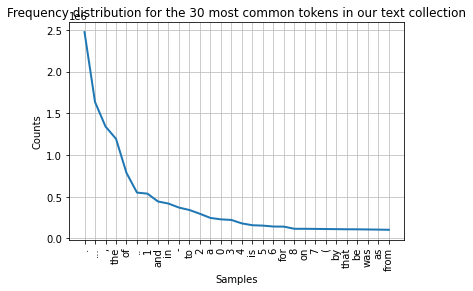

<AxesSubplot:title={'center':'Frequency distribution for the 30 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [10]:
fdist.plot(30,title='Frequency distribution for the 30 most common tokens in our text collection')

You can see that the distribution contains a lot of non-content words like “the”, “of”, “and”, etc. (we call these stop words) and punctuation. This is not very useful. Let's have a small peek on what these words are:

In [11]:
fdist.most_common(100)

[('.', 2472231),
 ('...', 1634912),
 (',', 1340864),
 ('the', 1193271),
 ('of', 784526),
 ('..', 549026),
 ('1', 536219),
 ('and', 442524),
 ('in', 417258),
 ('-', 369299),
 ('to', 340151),
 ('2', 294745),
 ('a', 245100),
 ('0', 228130),
 ('3', 220906),
 ('4', 179501),
 ('is', 157739),
 ('5', 153171),
 ('6', 142202),
 ('for', 141043),
 ('8', 115088),
 ('on', 115080),
 ('7', 113699),
 ('(', 112305),
 ('by', 111002),
 ('that', 109368),
 ('be', 108858),
 ('was', 107039),
 ('as', 105445),
 ('from', 103147),
 ('9', 99468),
 ('it', 94182),
 ('total', 94009),
 ('10', 91857),
 ('with', 89422),
 ('year', 82829),
 ('at', 82410),
 (')', 81355),
 ('were', 80461),
 ('i', 78835),
 ('no', 76388),
 ('11', 74753),
 ('this', 73792),
 ('are', 71826),
 ('or', 69733),
 ('which', 66949),
 ('12', 66645),
 (';', 66028),
 ('not', 65382),
 ('number', 63358),
 ('13', 57350),
 ('15', 55528),
 ('14', 55430),
 ('have', 53978),
 ('been', 53866),
 ('during', 51209),
 ('rs', 49600),
 ('.,', 46864),
 ('c', 44069),
 ('h

Yes, definitely not useful. Many of these words look like noise.

### 🐛Minitask:  Identify 3-4 categories of not-very-helpful tokens in the above set

Look at the above set of most popular tokens. Some of them look important and meaningful ('government', 'disease', etc.) but many of them are not very useful.

- Identify some families of not helpful tokens and write names for these families below.

Do not spend too much time on this (2 minutes maximum.)

In [ ]:
# Write your answer here



<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    There's no code involved here. You might have come up with: numbers, punctuation marks, typical but not very meaningful words. Keep reading for more information.
</details>









#### Removing tokens that are just noise

We can remove these before drawing the graph. We need to import `stopwords` from the `corpus` package to do this. The list of stop words is combined with a list of punctuation and a list of single digits using + signs into a new list of tokens to be ignored.

Here are some of Python's built-in 'cheat sheets' of punctuation and other 'meaningless characters', and some provided by the NLTK library:

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Let's have a look what words are usually discarded:
print(string.punctuation)
print(string.digits)
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
0123456789
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', '

In [13]:
# Note: we turn the strings of punctuation and digits into a list, 
# so they can be added to the other list of stop words.
print(list(string.punctuation))
print(list(string.digits))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


[('...', 1634912), ('..', 549026), ('total', 94009), ('10', 91857), ('year', 82829), ('11', 74753), ('12', 66645), ('number', 63358), ('13', 57350), ('15', 55528), ('14', 55430), ('rs', 49600), ('.,', 46864), ('c', 44069), ('20', 43549), ('16', 42999), ('cases', 39876), ('......', 39757), ('per', 39060), ('17', 39039), ('p', 38460), ('18', 38289), ('one', 38085), ('19', 34810), ('25', 32234), ('21', 32172), ('district', 30466), ('22', 30456), ('may', 30151), ('24', 29987)]


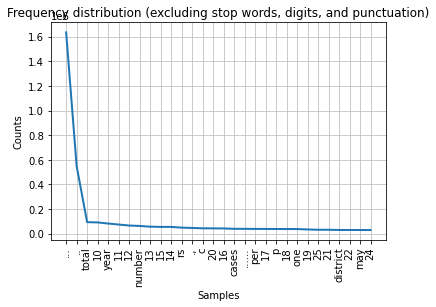

<AxesSubplot:title={'center':'Frequency distribution (excluding stop words, digits, and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [14]:
# Remove stop words, punctuation marks and digits. 
# Note: The set( ... ) syntax removes duplicates from the list.

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text = [token 
                 for token in corpus_tokens 
                 if not token in remove_these]

# Note: the above 3-line version could be a one-liner (see below). 
# It's up to you, which format you prefer. The format above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stop words, digits, and punctuation)')

# This graph should be a bit better...

### Manually adding more tokens to be ignored

The above graph is already much better, but sometimes we want to manually add some tokens to be ignored. It is easy, we just need to add more elements to the `remove_these` list.

We looked at the top 100 tokens and found these to be not particularly useful:

In [15]:
print([token 
       for (token,count) in fdist_filtered.most_common(100)])

['...', '..', 'total', '10', 'year', '11', '12', 'number', '13', '15', '14', 'rs', '.,', 'c', '20', '16', 'cases', '......', 'per', '17', 'p', '18', 'one', '19', '25', '21', 'district', '22', 'may', '24', '30', 'report', '23', 'hospital', 'government', 'veterinary', 'disease', '26', '28', 'average', 'two', '27', 'years', 'vaccination', '40', 'plague', '50', 'b', '29', '33', '31', 'table', 'males', 'females', 'f', '35', 'statement', '32', 'also', 'work', 'medical', 'case', 'general', 'deaths', '36', '34', 'animals', 'cent', '37', '38', 'would', 'bombay', '39', '100', 'ganja', ').', 'department', 'made', '41', '000', '45', 'india', 'died', '60', 'found', '42', 'showing', 'small', 'time', 'previous', '43', '00', '99', 'use', 'patients', '44', '46', 'first', 'treated', 'co']


These elements do not seem meaningful for our analysis:

- Rogue punctuation: '...', '..', etc.
- A lot of multi-digit numbers: '12', '000'
- Individual letters: 'a', 'j', etc.
- Some other not very meaningful words: 'also', 'would'

Let's create more lists of things we want to remove:

In [16]:
# Let's create a range of numbers from 0 to 100 and turn them into strings, so they are like '45' not like 45.
numbers_1_to_100 = [str(integer) for integer in range(101)]
print(numbers_1_to_100)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']


In [17]:
# Here are the weird puctuation marks:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,']
print(extra_punctuation_to_remove)

['.', '..', '...', '....', '.....', '......', ').', '.,']


In [18]:
individual_letters = list(string.ascii_lowercase)
print(individual_letters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### 🐛Minitask: Identify more words that are potentially noise

In a minute we will remove tokens that are noise. Based on your previous minitask and the current most popular tokens:

- Run the cell below
- Identify 10 more words that are most likely noise
- Add them to the list `some_more_tokens_to_remove`
- Run the cell again and continue

In [31]:
# Run this cell to see current 100 most popular tokens, as part of the task above.
# Then, add more items to some_more_tokens_to_remove

print( [token for (token,count) in fdist_filtered.most_common(100)])

some_more_tokens_to_remove = [ 'rs', 'per', 'would', '000','co']

filtered=([token 
      for (token,count) in fdist_filtered.most_common(100)
     if not token in some_more_tokens_to_remove])
print(filtered)

['...', '..', 'total', '10', 'year', '11', '12', 'number', '13', '15', '14', 'rs', '.,', 'c', '20', '16', 'cases', '......', 'per', '17', 'p', '18', 'one', '19', '25', '21', 'district', '22', 'may', '24', '30', 'report', '23', 'hospital', 'government', 'veterinary', 'disease', '26', '28', 'average', 'two', '27', 'years', 'vaccination', '40', 'plague', '50', 'b', '29', '33', '31', 'table', 'males', 'females', 'f', '35', 'statement', '32', 'also', 'work', 'medical', 'case', 'general', 'deaths', '36', '34', 'animals', 'cent', '37', '38', 'would', 'bombay', '39', '100', 'ganja', ').', 'department', 'made', '41', '000', '45', 'india', 'died', '60', 'found', '42', 'showing', 'small', 'time', 'previous', '43', '00', '99', 'use', 'patients', '44', '46', 'first', 'treated', 'co']
['...', '..', 'total', '10', 'year', '11', '12', 'number', '13', '15', '14', '.,', 'c', '20', '16', 'cases', '......', '17', 'p', '18', 'one', '19', '25', '21', 'district', '22', 'may', '24', '30', 'report', '23', 'hos



<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    some_more_tokens_to_remove = [ 'rs', 'per', 'would','one','two','first'
                                 '000',  '00',  'co', 'ditto', '1st', 'ii', 
                                 'total', 'number', 'year', 'years']
    ### END SOLUTION
</details>









#### Note about cleaning up data carefully
Sometimes you might find that certain tokens do not communicate content, like 'would', and we are showing you how to remove them here.

This comes with a warning, though: you have to be very careful performing steps like this, because it has the potential to completely bias your data. Careful cleaning of messy datasets is very important.

Also: While it makes sense to remove stop words for this type of frequency analysis, it essential to keep them in the data for other text analysis tasks. Retaining the original text is crucial, for example, when deriving part-of-speech tags for a text or for recognising names in a text.

Now we can re-do the visualisation again, this time using an expanded and customised list of items to ignore.
This should be a more meaningful graph!

[('total', 94009), ('year', 82829), ('number', 63358), ('cases', 39876), ('one', 38085), ('district', 30466), ('may', 30151), ('report', 29749), ('hospital', 28280), ('government', 26238), ('veterinary', 25730), ('disease', 25709), ('average', 25560), ('two', 25164), ('years', 24751), ('vaccination', 24252), ('plague', 23525), ('table', 21814), ('males', 21500), ('females', 21153), ('statement', 20795), ('also', 20555), ('work', 20459), ('medical', 20169), ('case', 19838), ('general', 19358), ('deaths', 19189), ('animals', 18691), ('cent', 18427), ('bombay', 17257)]


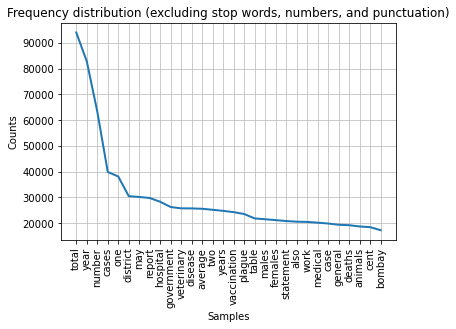

<AxesSubplot:title={'center':'Frequency distribution (excluding stop words, numbers, and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [32]:
# Let's combine it all together and generate our new graph.

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_tokens_to_remove)

filtered_text = [token 
                 for token in corpus_tokens 
                 if not token in remove_these]
    
fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stop words, numbers, and punctuation)')

<a id="3"></a>
# 3. Advanced Visualisation: Word Clouds

## Basic word cloud:

We can also present the filtered tokens as a word cloud. A word cloud is a modern type of graph where words' sizes communicate their frequency.  It's often used to have a quick an overview of the corpus. Additionally, word clouds can be customised as we'll see below.

We will use the `WordCloud( ).generate_from_frequencies()` method.  The input to this method is a frequency dictionary of all tokens and their counts in the text.

You will also see another way to create a simplified frequency count of words. That's because a word cloud requires words to be in a dictionary format:

 `{'total': 94009, 'year': 82829, 'number': 63358, 'cases': 39876 .... }`
 
We will use another Python package, `Counter`, to create such a dictionary using the `filtered_text` variable as input. Note that `Counter` is much less powerful than `FreqDist`, but you might see it in other people's code, so we want you to be familiar with it.

Once we have the data in the correct format, we generate the word cloud using the frequency dictionary and plot the figure to a specified size. We can show the plot using `plt.show()`.

In [33]:
from collections import Counter
simple_frequencies_dict = Counter(filtered_text)

# Let's have a peek into this dictionary. How many times does the word 'hospital' appear in filtered_text?
print(simple_frequencies_dict['hospital'])

28280


#### Note on installing extra software in Jupyter Notebooks with !pip

To create a word cloud, we'll first show you one of the most powerful features of of Jupyter Notebooks: you can download and install almost any software from the internet into your Notebook, including the virtualized server your Notebooks run on in Noteable. Because it is 'sandboxed' it is primarily safe. To install things we use `!pip`, the Python package installer command, which we'll use for installing `wordcloud`.

In [34]:
# Run this now.  It will install wordcloud on your machine.
!pip install wordcloud

@Lucy --- start of making word clouds clear by using "width," "height," and "max_font_size" parameters in the WordCloud().  The word cloud that uses an image as a mask requires a higher-quality image in order to make that word cloud clearer.  *Note: the comments in the code cell below indicates which code was originally in this Notebook and which are my suggestions*

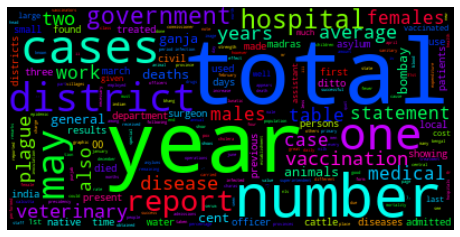

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=400, max_font_size=160,colormap="hsv").generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))

# You can play with the width, height, max_font_size, and figsize parameters to change the size, layout, 
# and clarity of your word cloud.  Try commenting out the previous word cloud code and running the code below.
# What differences to you observe?
# cloud = WordCloud(width=400, height=200, max_font_size=80,colormap="hsv").generate_from_frequencies(simple_frequencies_dict)
# plt.figure(figsize=(8,6))

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# You should see a colourful diagram below. It is generated uniquely for you at this moment in time. 
# Generate it again and you will see that it changes slightly.

### 🖇💬Buddy discussion: What text data would a word cloud be really good and really bad for?

#### Ask your buddy now if they reached the **BUDDY TASK**. Once you both did, complete this task:

Try to identify strengths and weaknesses of word clouds.

Don't spend too much time on this (2 minutes maximum) but take note of your favourite idea.

## Fancy-shaped word cloud

And now a shaped word cloud for a bit of fun! This will present your word cloud in the shape of a given image.

You need a shape file, which we provide for you in the form of the medical symbol (it looks like two snakes wrapped around a staff with wings).

The mask image needs to have a transparent background so that only the black shape is used as a mask for the word cloud - parts that are black will be filled with your words, parts that are transparent will be left empty. You can use your own images later!

It would be fun if we can customise:

- The shape in which the words arrange themselves (e.g., circle, shape of the UK, question mark)
- Colours to use for the words

The **geeky bits** about how we use images and colours **(feel free to skip reading them)**:

- To display the shaped word cloud you need to import the Image package from `PIL` as well as `numpy`. The image first needs to be opened and converted into a numpy array which we call `med_mask`. 
- A customised colour map (cmap) is created to present the words in black font. 
- Colours use #RRGGBB format where two hexadecimal characters (0123456789ABCDEF) describe amount of Red, Green and Blue we want. E.g., `#FF0000` means full red, no green, no blue. `#000000` means no red, nor green, nor blue, which is black. `#FFFFFF` is white, `#111111` and `#222222` are shades of grey, getting darker as amount of colour (represented in hexadecimal characters) increases.
- The word cloud is created with a white background, with the mask and the colour map set as parameters, and generated from the dictionary containing the number of occurrences for each word.

(-0.5, 337.5, 337.5, -0.5)

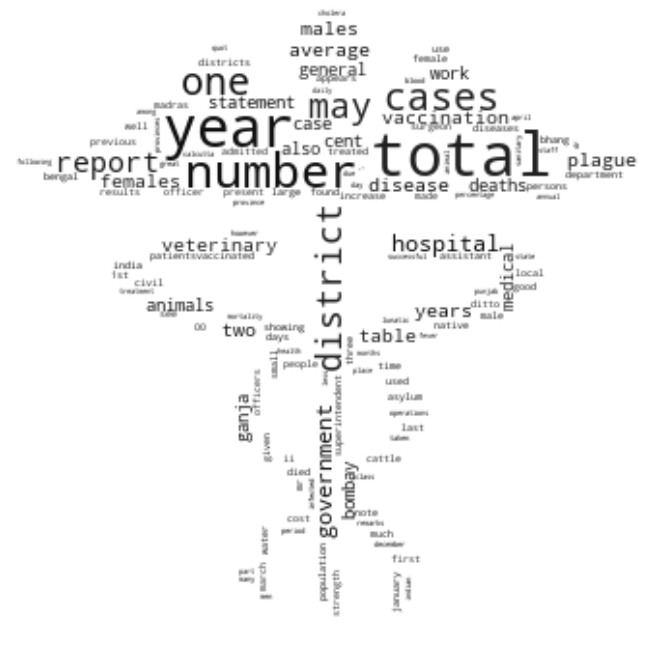

In [37]:
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Masking image
medical_icon_mask_image = np.array(Image.open("./images/medical.png"))

# Custom Colormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Image details: background, shape-mask, colours 
wordcloud = WordCloud(width=800, height=1600, background_color="white", mask=medical_icon_mask_image, colormap=cmap)

wordcloud.generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

### 🦋 Extra task (optional): if you have finished everything else already:

- Can you create a wordcloud of the presidential speeches corpus?
- Then, can you use your own masking image?